In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [19]:
def win_probability(df, away_elo, home_elo):
    away_team_wp = 1/(1 + 10**(((home_elo+100)-away_elo)/400))
    home_team_wp = 1/(1 + 10**((away_elo-(home_elo+100))/400))

    df['away_win_prob'] = away_team_wp
    df['home_win_prob'] = home_team_wp

    return df

In [20]:
elo_df = pd.read_csv('https://raw.githubusercontent.com/luke-lite/NBA-Prediction-Modeling/main/data/game_info_elo.csv', index_col=0)
elo_df

,game_id,season,date,away_team,away_score,home_team,home_score,result,away_elo_i,away_elo_n,home_elo_i,home_elo_n,elo_pred
0,131410290001,1314,2013-10-29,ORL,87,IND,97,1,1313.231700,1311.533869,1583.572100,1585.269931,1
1,131410290002,1314,2013-10-29,CHI,95,MIA,107,1,1519.912400,1516.608783,1691.889600,1695.193217,1
2,131410290003,1314,2013-10-29,LAC,103,LAL,116,1,1586.588400,1575.414216,1511.020000,1522.194184,1
3,131410300004,1314,2013-10-30,BRK,94,CLE,98,1,1548.436500,1540.172399,1369.282300,1377.546401,0
4,131410300005,1314,2013-10-30,BOS,87,TOR,93,1,1484.961500,1479.784941,1483.983500,1489.160059,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11974,222304091226,2223,2023-04-09,UTA,117,LAL,128,1,1419.106244,1415.566964,1567.961696,1571.500976,1
11975,222304091227,2223,2023-04-09,NOP,108,MIN,113,1,1543.862541,1538.995985,1535.490950,1540.357507,1
11976,222304091228,2223,2023-04-09,MEM,100,OKC,115,1,1613.827418,1599.928440,1505.092965,1518.991944,0
11977,222304091229,2223,2023-04-09,LAC,119,PHO,114,0,1537.722013,1548.985300,1588.174579,1576.911292,1


In [21]:
win_probability(elo_df, elo_df['away_elo_i'], elo_df['home_elo_i'])

,game_id,season,date,away_team,away_score,home_team,home_score,result,away_elo_i,away_elo_n,home_elo_i,home_elo_n,elo_pred,away_win_prob,home_win_prob
0,131410290001,1314,2013-10-29,ORL,87,IND,97,1,1313.231700,1311.533869,1583.572100,1585.269931,1,0.106039,0.893961
1,131410290002,1314,2013-10-29,CHI,95,MIA,107,1,1519.912400,1516.608783,1691.889600,1695.193217,1,0.172841,0.827159
2,131410290003,1314,2013-10-29,LAC,103,LAL,116,1,1586.588400,1575.414216,1511.020000,1522.194184,1,0.464898,0.535102
3,131410300004,1314,2013-10-30,BRK,94,CLE,98,1,1548.436500,1540.172399,1369.282300,1377.546401,0,0.611981,0.388019
4,131410300005,1314,2013-10-30,BOS,87,TOR,93,1,1484.961500,1479.784941,1483.983500,1489.160059,1,0.361233,0.638767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11974,222304091226,2223,2023-04-09,UTA,117,LAL,128,1,1419.106244,1415.566964,1567.961696,1571.500976,1,0.192705,0.807295
11975,222304091227,2223,2023-04-09,NOP,108,MIN,113,1,1543.862541,1538.995985,1535.490950,1540.357507,1,0.371111,0.628889
11976,222304091228,2223,2023-04-09,MEM,100,OKC,115,1,1613.827418,1599.928440,1505.092965,1518.991944,0,0.512567,0.487433
11977,222304091229,2223,2023-04-09,LAC,119,PHO,114,0,1537.722013,1548.985300,1588.174579,1576.911292,1,0.296072,0.703928


In [17]:
elo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 0 to 11978
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        11979 non-null  int64  
 1   season         11979 non-null  int64  
 2   date           11979 non-null  object 
 3   away_team      11979 non-null  object 
 4   away_score     11979 non-null  int64  
 5   home_team      11979 non-null  object 
 6   home_score     11979 non-null  int64  
 7   result         11979 non-null  int64  
 8   away_elo_i     11979 non-null  float64
 9   away_elo_n     11979 non-null  float64
 10  home_elo_i     11979 non-null  float64
 11  home_elo_n     11979 non-null  float64
 12  elo_pred       11979 non-null  int64  
 13  away_win_prob  11979 non-null  float64
 14  home_win_prob  11979 non-null  float64
dtypes: float64(6), int64(6), object(3)
memory usage: 1.5+ MB


/tmp/ipykernel_15915/3449563420.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_accuracy = elo_df.groupby('win_prob_bin').apply(lambda x: (x['elo_pred'] == x['result']).mean() * 100)
/tmp/ipykernel_15915/3449563420.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bin_accuracy = elo_df.groupby('win_prob_bin').apply(lambda x: (x['elo_pred'] == x['result']).mean() * 100)


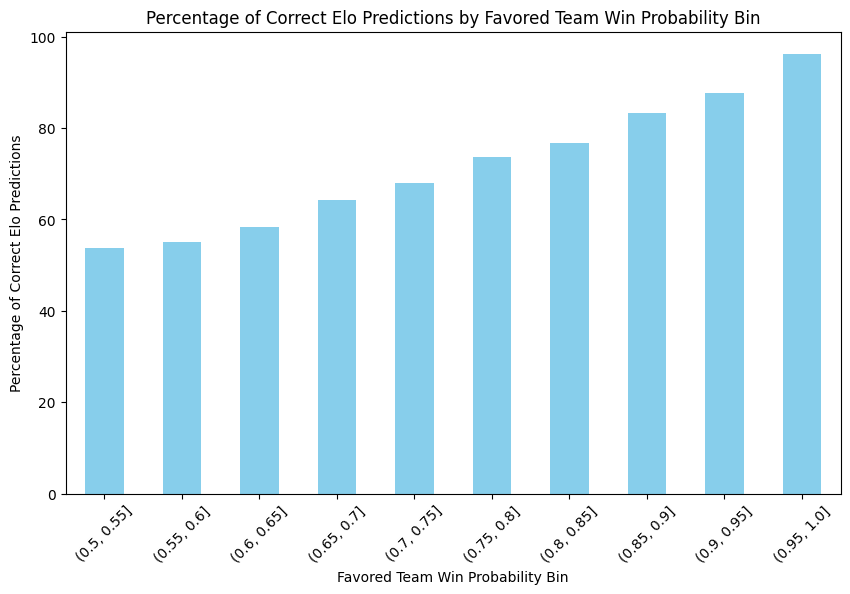

In [23]:
# Adjust the home Elo by adding 100
elo_df['home_elo_adjusted'] = elo_df['home_elo_i'] + 100

# Determine the win probability of the favored team
elo_df['favored_win_prob'] = np.where(elo_df['away_win_prob'] > elo_df['home_win_prob'],
                                      elo_df['away_win_prob'], elo_df['home_win_prob'])

# Bin the favored win probabilities into 10 distinct bins
elo_df['win_prob_bin'] = pd.cut(elo_df['favored_win_prob'], bins=np.linspace(0.5, 1, 11))

# Calculate the percentage of correct predictions in each bin
bin_accuracy = elo_df.groupby('win_prob_bin').apply(lambda x: (x['elo_pred'] == x['result']).mean() * 100)

# Plotting the data
plt.figure(figsize=(10, 6))
bin_accuracy.plot(kind='bar', color='skyblue')
plt.xlabel('Favored Team Win Probability Bin')
plt.ylabel('Percentage of Correct Elo Predictions')
plt.title('Percentage of Correct Elo Predictions by Favored Team Win Probability Bin')
plt.xticks(rotation=45)
plt.show()

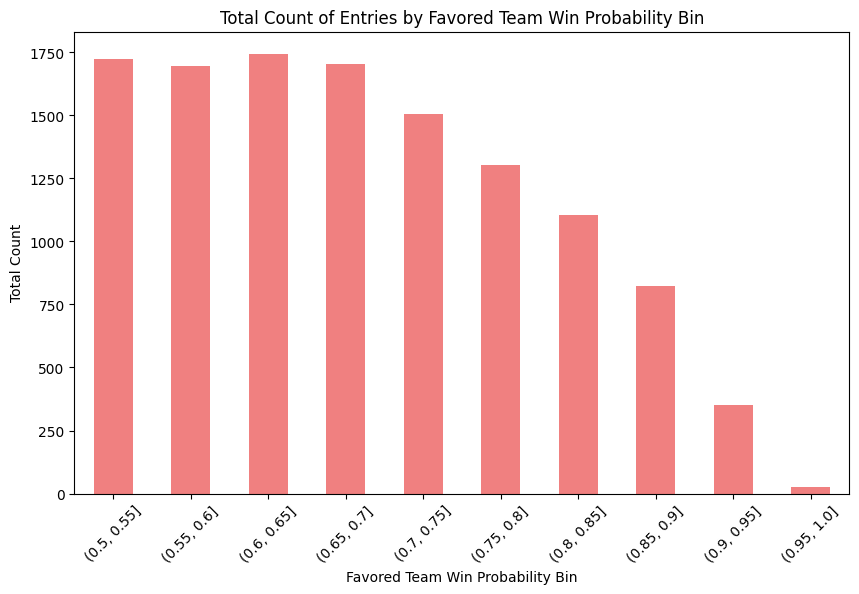

In [24]:
# Calculate the total count in each bin
bin_count = elo_df['win_prob_bin'].value_counts(sort=False)

# Plotting the data
plt.figure(figsize=(10, 6))
bin_count.plot(kind='bar', color='lightcoral')
plt.xlabel('Favored Team Win Probability Bin')
plt.ylabel('Total Count')
plt.title('Total Count of Entries by Favored Team Win Probability Bin')
plt.xticks(rotation=45)
plt.show()